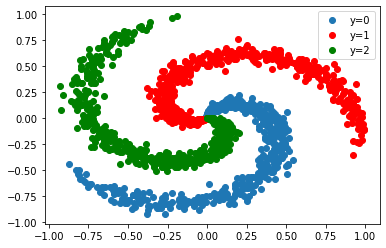

In [5]:

import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)
np.random.seed(1)


def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _,yhat=torch.max(model(XX),1)
    yhat=yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:]==0,0], X[y[:]==0,1], 'ro', label='y=0')
    plt.plot(X[y[:]==1,0], X[y[:]==1,1], 'go', label='y=1')
    plt.plot(X[y[:]==2,0], X[y[:]==2,1], 'o', label='y=2')
    plt.title("decision region")
    plt.legend()



class Data(Dataset):
    
    #  modified from: http://cs231n.github.io/neural-networks-case-study/
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D)) # data matrix (each row = single example)
        y = np.zeros(N * K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N * j, N * (j + 1))
          r = np.linspace(0.0, 1, N) # radius
          t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
          X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
          y[ix] = j
    
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the diagram
    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y=1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2, 1].numpy(), 'go',label="y=2")
        plt.legend()



class Net(nn.Module):
  def __init__(self,Layers):
    super(Net,self).__init__()
    self.the_list = nn.ModuleList()
    for in_,out_ in zip(Layers,Layers[1:]):
      self.the_list.append(nn.Linear(in_,out_))
    
  def forward(self,x):
    L =len(self.the_list)
    for l,linear in zip (range(L),self.the_list):
      if l < L -1:
        x = F.relu(linear(x))
      else:
        x = linear(x)
    return x


def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    LOSS = []
    ACC = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        LOSS.append(loss.item())
        ACC.append(accuracy(model,data_set))
        
    results ={"Loss":LOSS, "Accuracy":ACC}
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS,color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis = 'y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()
    return results


def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

data_set = Data()
data_set.plot_data()
data_set.y = data_set.y.view(-1)

In [0]:
train_loader = DataLoader(dataset=data_set,batch_size=20)
Results = {"momentum 0": {"Loss": 0, "Accuracy:": 0}, "momentum 0.1": {"Loss": 0, "Accuracy:": 0}}
learning_rate = 0.10
Layers = [2,50,3]
criterion = nn.CrossEntropyLoss()

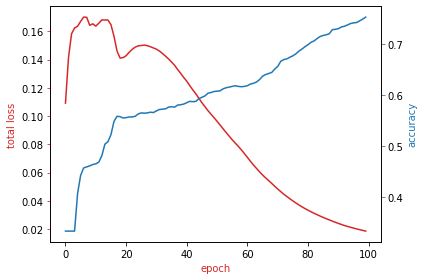

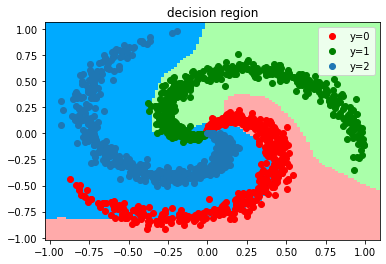

In [11]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate)
Results["momentum 0"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

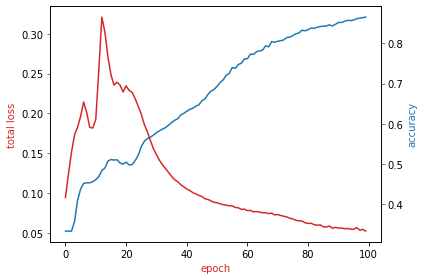

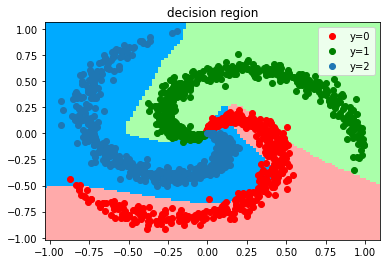

In [15]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.1)
train_loader = DataLoader(dataset=data_set, batch_size=20)
Results["momentum 0.1"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

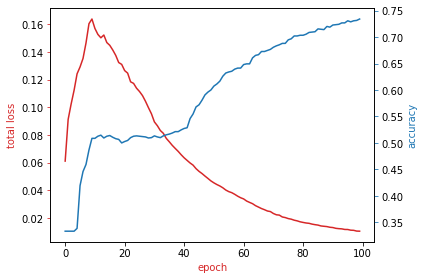

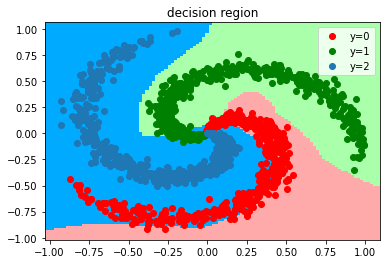

In [17]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.2)
train_loader = DataLoader(dataset=data_set, batch_size=20)
Results["momentum 0.2"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

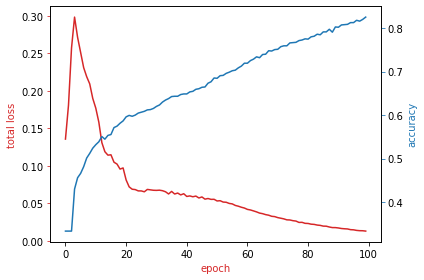

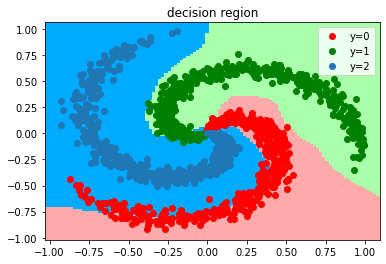

In [20]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.3)
train_loader = DataLoader(dataset=data_set, batch_size=20)
Results["momentum 0.3"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

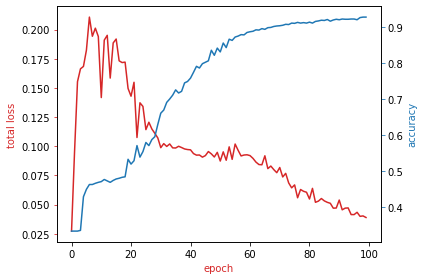

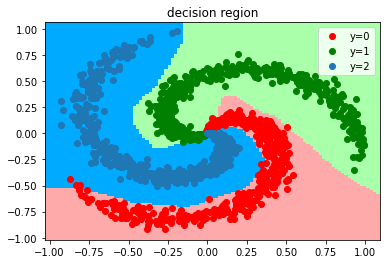

In [19]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.4)
#train_loader = DataLoader(dataset=data_set, batch_size=20)
Results["momentum 0.4"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

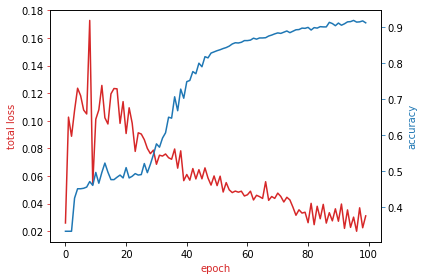

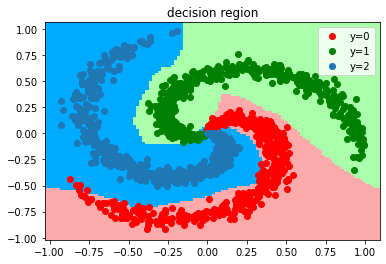

In [26]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.5)
Results["momentum 0.5"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

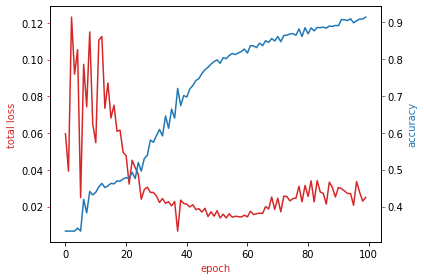

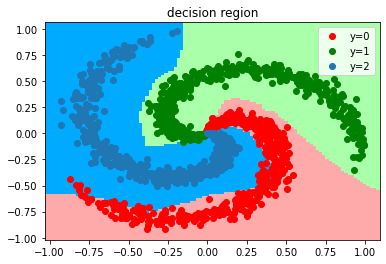

In [27]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.6)
Results["momentum 0.6"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

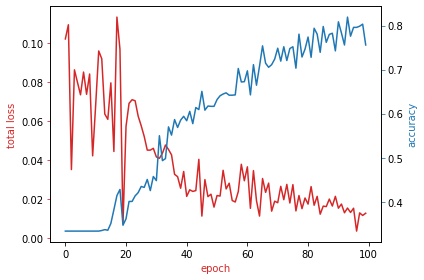

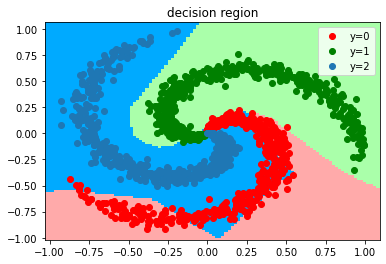

In [28]:
model = Net(Layers)
optimiser = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.7)
Results["momentum 0.7"] = train(data_set,model,criterion,train_loader,optimiser)
plot_decision_regions_3class(model, data_set)

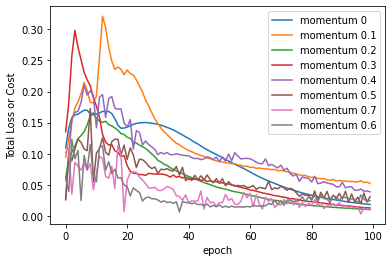

In [29]:

for key, value in Results.items():
    plt.plot(value['Loss'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Total Loss or Cost')

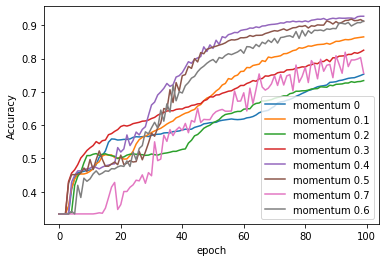

In [30]:
# Plot the Accuracy result for each term

for key, value in Results.items():
    plt.plot(value['Accuracy'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')